In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from  wordcloud import WordCloud

In [3]:
PATH = "dataset/SMSSpamCollection"

In [4]:
data = pd.read_csv(PATH, delimiter = "\t", names = ["label", "text"])

In [5]:
data_original = data.copy()

In [6]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.iloc[0]["text"]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
data.columns

Index(['label', 'text'], dtype='object')

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.reset_index(drop = True, inplace = True)

In [11]:
data.shape

(5169, 2)

In [12]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [13]:
data[data.label == "ham"].head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [14]:
data[data.label == "spam"].head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


<h2>Data insights</h2>

<h3>Spam</h3>

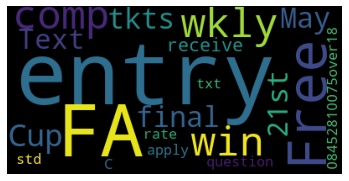

In [15]:
wordcloud = WordCloud().generate(data.text[2])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

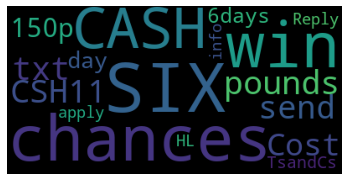

In [16]:
wordcloud = WordCloud().generate(data.text[11])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h3>Not spam</h3>

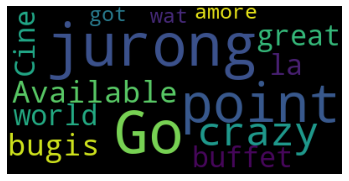

In [17]:
wordcloud = WordCloud().generate(data.text[0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

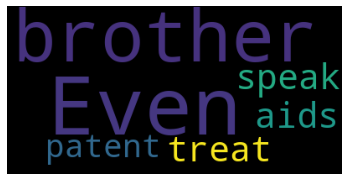

In [18]:
wordcloud = WordCloud().generate(data.text[6])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<h3>Preprocessing</h3>

In [19]:
import re

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [22]:
ps = PorterStemmer()

In [30]:
corpus = []
for i in range(len(data)):
  msg = data.text[i]
  msg = re.sub('[^a-zA-Z]', " ", msg)
  msg = msg.lower()
  msg = msg.split()
  msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')]
  msg = " ".join(msg)
  corpus.append(msg)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(max_features = 2500)

In [36]:
X  = cv.fit_transform(corpus).toarray()

In [37]:
y = pd.get_dummies(data['label'])

In [38]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [46]:
y = y.drop(['ham'], axis = 1)

In [73]:
y = np.array(y).reshape(-1)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
model = MultinomialNB()

In [84]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix

In [88]:
cmat = confusion_matrix(y_test, y_pred)

In [99]:
cmat

array([[911,   8],
       [  2, 113]])

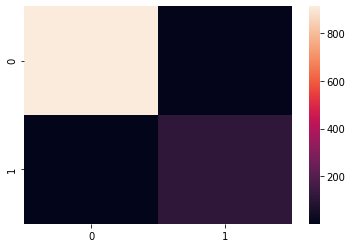

In [98]:
sns.heatmap(cmat, cmap = )

In [92]:
from sklearn.metrics import accuracy_score

In [94]:
acc = accuracy_score(y_test, y_pred)

In [95]:
print(acc)

0.9903288201160542


Accuracy is good